In [1]:
#Crie um vetor com 1000 números reais aleatórios entre 0 e 100 cada, 
#mas em uma distribuição gaussiana com centro em 40 e dispersão de 15

# dicas: - utilize a função random.normal da biblioteca numpy, onde
#           random.normal(mu, sigma, N)
#           por exemplo: random.normal(10, 0.2, 3) vai gerar três números randômicos em uma distriuição gaussiana
#                                                  centralizada no número 10 com desvio padrão de 0.2

In [2]:
import numpy as np
X = np.random.normal(40, 15, 1000)

In [3]:
#Plote a PDF e a CDF, do vetor criado, juntos utilizando "hist" mas o segundo em um eixo diferente
#dica: -veja o exemplo de dois gráficos em uma mesma imagem com eixos diferentes
#      -veja os parâmetros cumulative e density          

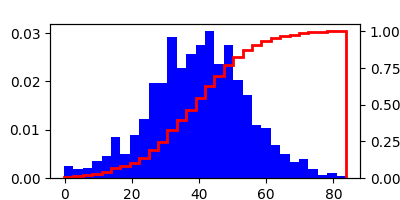

In [4]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(4, 2))

ax1.hist(X, density=True, color='blue', bins=30)

ax1_twin = ax1.twinx()

ax1_twin.hist(X, density=True, cumulative=True, color='red', linewidth=2, histtype='step', bins=30)

display(f)


In [5]:
# Calcule os percentis da distribuição para as seguintes porcentagens:
# 5%, 25%, 75%, 95%
#dica: -ordene o vetor com "sorted" e conte o número de itens com "len"

In [6]:
X_sorted = sorted(X)

In [7]:
(X_sorted[int(0.05*len(X_sorted))],X_sorted[int(0.25*len(X_sorted))],X_sorted[int(0.75*len(X_sorted))],X_sorted[int(0.95*len(X_sorted))])

Out[16]: (14.86532181200139, 30.615455527592175, 49.21297303492253, 63.112863965684)

In [8]:
#Faça o mesmo, mas com a função percentile da biblioteca numpy

In [9]:
import numpy as np
np.percentile(X,[5,25,75,95])

Out[17]: array([14.86365591, 30.61279933, 49.21136951, 63.09100863])

In [10]:
#Encontre os valores que delimitam o percentil de 68.3% em torno da média
#
#dica: -pode considerar que a distribuição é simétrica em torno da média, ou seja a média é igual à mediana e percentuais distribuim-se
#       simetricamente em torno dela


In [11]:
68.3/2

Out[19]: 34.15

In [12]:
import numpy as np
np.mean(X_sorted)

Out[18]: 39.82910314708156

In [13]:
X_sorted[int(500+0.05*len(X_sorted))]

Out[27]: 41.92204261204056

In [14]:
(X_sorted[int((len(X_sorted)/2) - 0.3415*len(X_sorted))], X_sorted[int((len(X_sorted)/2) + 0.3415*len(X_sorted))])

Out[23]: (26.169610940188612, 53.71381072053501)

In [15]:
#Faça o mesmo para 95% 

In [16]:
(X_sorted[int((len(X_sorted)/2) - (0.95/2)*len(X_sorted))], X_sorted[int((len(X_sorted)/2) + (0.95/2)*len(X_sorted))])

Out[28]: (9.817559848057535, 68.0436106885637)

In [17]:
#Verifique a coincidência do intervalor de 68.3% com o desvio padrão e o porquê o chamam de 1sigma, e o de 95% com 2sigma
#
#dica: -use a função std da biblioteca numpy

In [18]:
(np.mean(X)-np.std(X), np.mean(X)+np.std(X))

Out[31]: (25.527338265621104, 54.130868028542004)

In [19]:
(np.mean(X)-2*np.std(X), np.mean(X)+2*np.std(X))

Out[32]: (11.225573384160654, 68.43263291000245)

In [20]:
#Utilize a função norm.interval da biblioteca scipy.stats pra confirmar que para uma distribuição normal, os intervalos de confianção
#são os obtidos de forma manual para 68.3% e para 95%

#dica: scipy.stats.norm.interval(cl,loc=mean,scale=stddev)

In [21]:
import scipy.stats as st

st.norm.interval(0.95, 40, 15)

Out[42]: (10.600540231899188, 69.39945976810081)

In [22]:
#Plot a PDF e a CDF da distribuição novamente, juntamente com retas verticais que delimitem a região de 1sigma e de 2sigma e com legendas
#
#dica:  -use ax1.axvline(pos_x, pos_y_inicial, pos_y_final, color='black', label='teste')

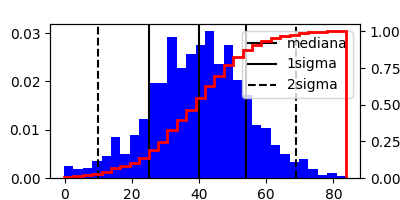

In [23]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(figsize=(4, 2))

ax1.hist(X, density=True, color='blue', bins=30)
ax1.axvline(40, 0, 1, color='black', label='mediana')

ax1.axvline(25, 0, 1, color='black', label='1sigma')
ax1.axvline(54, 0, 1, color='black')

ax1.axvline(10, 0, 1, color='black', linestyle='--', label='2sigma')
ax1.axvline(69, 0, 1, color='black', linestyle='--')

ax1_twin = ax1.twinx()

ax1_twin.hist(X, density=True, cumulative=True, color='red', linewidth=2, histtype='step', bins=30)

ax1.legend()
display(f)